<a href="https://colab.research.google.com/github/Akanerd/Computer-Vision---Orbit/blob/main/Tugas_Computer_Vision_Fake_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama Kelompok :**
*   Richie Dae z
*   M Hafizh Azzasafah
*   Lwy Indra Agusstewan
*   Febbi Okataviani P 
*   Octarian Prastya

# Load Data

In [8]:
!wget --no-check-certificate \
    https://github.com/Akanerd/Computer-Vision---Orbit/blob/main/train.zip?raw=true \
    -O /tmp/train.zip

--2022-03-31 03:13:25--  https://github.com/Akanerd/Computer-Vision---Orbit/blob/main/train.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Akanerd/Computer-Vision---Orbit/raw/main/train.zip [following]
--2022-03-31 03:13:25--  https://github.com/Akanerd/Computer-Vision---Orbit/raw/main/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Akanerd/Computer-Vision---Orbit/main/train.zip [following]
--2022-03-31 03:13:26--  https://raw.githubusercontent.com/Akanerd/Computer-Vision---Orbit/main/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP re

In [9]:
!wget --no-check-certificate \
   https://github.com/Akanerd/Computer-Vision---Orbit/blob/main/test.zip?raw=true \
    -O /tmp/valid.zip

--2022-03-31 03:13:28--  https://github.com/Akanerd/Computer-Vision---Orbit/blob/main/test.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Akanerd/Computer-Vision---Orbit/raw/main/test.zip [following]
--2022-03-31 03:13:29--  https://github.com/Akanerd/Computer-Vision---Orbit/raw/main/test.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Akanerd/Computer-Vision---Orbit/main/test.zip [following]
--2022-03-31 03:13:29--  https://raw.githubusercontent.com/Akanerd/Computer-Vision---Orbit/main/test.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

In [10]:
import os 
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')

local_zip = '/tmp/valid.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [19]:
train_fakepokemon_dir = os.path.join('/tmp/train/')

valid_fakepokemon_dir = os.path.join('/tmp/test/')

In [20]:
train_fakepokemon_names = os.listdir(train_fakepokemon_dir)
print(train_fakepokemon_names[:10])

valid_fakepokemon_names = os.listdir(valid_fakepokemon_dir)
print(valid_fakepokemon_names[:10])

['46.JPG', '222.JPG', '337.JPG', '122.JPG', '21.JPG', '187.JPG', '100.JPG', '170.JPG', '309.JPG', '106.JPG']
['397.JPG', '418.JPG', '381.JPG', '438.JPG', '392.JPG', '398.JPG', '433.JPG', '416.JPG', '412.JPG', '394.JPG']


In [21]:
print('total fakepokemon training images : ', len(os.listdir(train_fakepokemon_dir)))
print('total fakepokemon validation images : ', len(os.listdir(valid_fakepokemon_dir)))

total fakepokemon training images :  373
total fakepokemon validation images :  78


In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
from glob import glob 
from skimage.io import imread
import gc
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [51]:
base_tile_dir = '/tmp/train/'
df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.JPG'))})
df['id'] = df.path.map(lambda x: x.split('/')[3].split(".")[0])
labels = pd.read_csv("train_labels.csv")
labels['id'] = labels['id'].astype('str')
labels = labels.sort_values(by=['id'], ignore_index = True)
df['id'] = df['id'].astype('str')
df = df.sort_values(by=['id'], ignore_index = True)
df_data = pd.merge(labels, df, on="id")

# CNN


In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

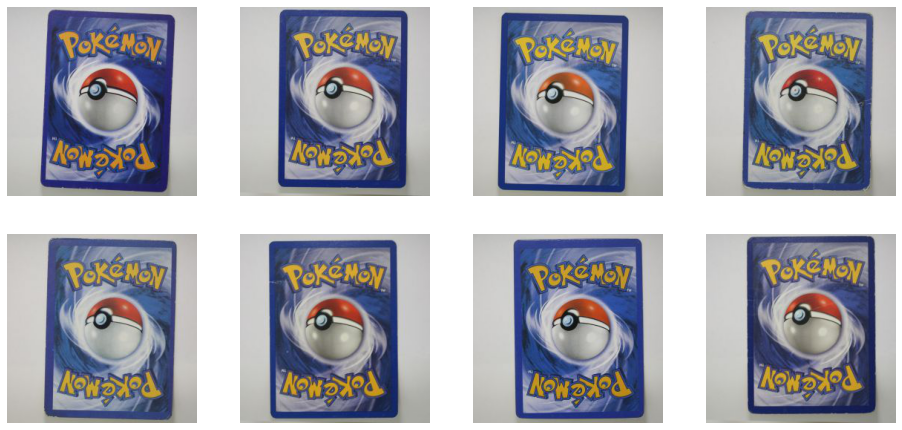

In [28]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_fakepokemon_pic = [os.path.join(train_fakepokemon_dir, fname)
                      for fname in train_fakepokemon_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_fakepokemon_pic):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/',
    classes = ['test','train'],
    target_size=(200,200),
    batch_size = 120,
    class_mode='binary'
)
valid_generator = validation_datagen.flow_from_directory(
    '/tmp/',
    classes = ['test','train'],
    target_size=(200,200),
    batch_size=19,
    class_mode='binary',
    shuffle=False
)

Found 451 images belonging to 2 classes.
Found 451 images belonging to 2 classes.


# Build Model

In [53]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm,datasets
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [54]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    #tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                    #                        activation='relu',padding='same',
                                    #                        input_shape = (200,200,3),
                                    #                        kernel_initializer='he_normal',
                                    #                        bias_initializer='zeros'),
                                    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [56]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training

In [58]:
history = model.fit(train_generator,
                    steps_per_epoch=4,
                    epochs=15,
                    verbose=1,
                    validation_data=valid_generator,
                    validation_steps=4)

Epoch 1/15
4/4 [==============================] - 7s 2s/step - loss: 0.5057 - accuracy: 0.8271 - val_loss: 2.0386 - val_accuracy: 0.0000e+00
Epoch 2/15
4/4 [==============================] - 6s 1s/step - loss: 0.4634 - accuracy: 0.8271 - val_loss: 1.5230 - val_accuracy: 0.0000e+00
Epoch 3/15
4/4 [==============================] - 6s 1s/step - loss: 0.4596 - accuracy: 0.8271 - val_loss: 1.8264 - val_accuracy: 0.0000e+00
Epoch 4/15
4/4 [==============================] - 6s 1s/step - loss: 0.4564 - accuracy: 0.8271 - val_loss: 1.6663 - val_accuracy: 0.0000e+00
Epoch 5/15
4/4 [==============================] - 6s 1s/step - loss: 0.4538 - accuracy: 0.8271 - val_loss: 1.7840 - val_accuracy: 0.0000e+00
Epoch 6/15
4/4 [==============================] - 6s 1s/step - loss: 0.4582 - accuracy: 0.8271 - val_loss: 1.4871 - val_accuracy: 0.0000e+00
Epoch 7/15
4/4 [==============================] - 6s 1s/step - loss: 0.4590 - accuracy: 0.8271 - val_loss: 1.7668 - val_accuracy: 0.0000e+00
Epoch 8/15
4/

# Evaluation Accuracy,ROC,AUC

In [59]:
model.evaluate(valid_generator)

24/24 [==============================] - 3s 103ms/step - loss: 0.3830 - accuracy: 0.8271


[0.38299959897994995, 0.8270509839057922]

In [60]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
preds = model.predict(valid_generator,verbose=1)

24/24 [==============================] - 3s 99ms/step


In [61]:
fpr,tpr,_=roc_curve(valid_generator.classes,preds)

In [62]:
roc_auc=auc(fpr,tpr)

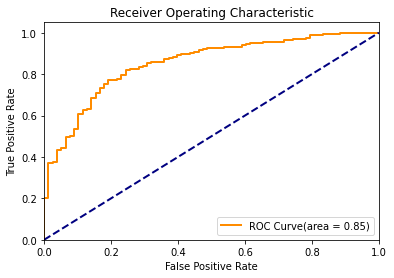

In [63]:
plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw,label='ROC Curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model.save('model_2.h5')

Making Predictions

Saving Grass-JW.jpg to Grass-JW.jpg
[1.]
Grass-JW.jpgGrass


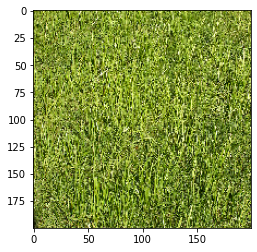

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():

  path = '/content/'+fn
  img = image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size =10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn+"Dandelion")
  else:
    print(fn+"Grass")

In [ ]:
import os,signal
os.kill(os.getpid(), signal.SIGKILL)